In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import torch
import pandas as pd
import os
import pickle
from copy import deepcopy


from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint
from scipy.stats import uniform
from scipy.stats import loguniform


import optuna
optuna.logging.set_verbosity(0) 


import warnings
warnings.filterwarnings('ignore')

import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')



import npm_nnf.utils.utils_kernels as KT 
import npm_nnf.density_estimation.utils_density as utils
import npm_nnf.density_estimation.utils_data_generator as generators
import npm_nnf.utils.utils_train as utils_train

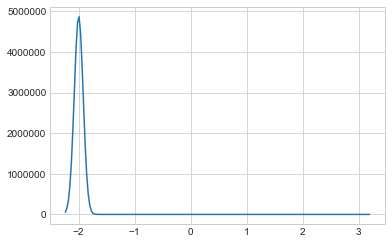

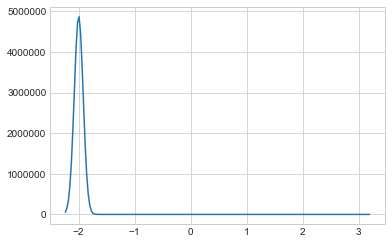

In [40]:
# Number of data points we will be using and basic parameters of the model



d = 10
#def gen(n = ndata):
#    ds,_ = generators.generateGaussianD(torch.zeros(d),1/np.sqrt(d),n,d)
#    return ds

r_data = 2
sigma_data = np.sqrt(1/(2*np.pi))
def gen(ndata):
    #ds,_ = generators.generate2GaussianD(r_data,sigma_data,ndata,d)
    ds,_ = generators.generate3GaussianD(r_data,sigma_data,0.2*sigma_data,ndata,d)
    return ds

#_,density_data=generators.generate2GaussianD(r_data,sigma_data,1,d)
_,density_data=generators.generate3GaussianD(r_data,sigma_data,0.2*sigma_data,1,d)


base = 'gaussian'
mu_base,eta_base = torch.zeros((d,)),5

ndata = 500
data_set = gen(ndata)






    
    

In [41]:
save_path = f'models/density_estimation_{d}d'

In [42]:
def gentest(ntest,ctest,radtest,frac = 0.5):
    ds = torch.zeros((ntest,d))
    ntestrand = int(frac*ntest)
    ntestnear = ntest - ntestrand
    ds[:ntestrand,:] = ctest + radtest*(2*torch.rand(ntestrand,d) - 1)
    #ds[ntestrand:,:],_ = generators.generate2GaussianD(r_data,sigma_data,ntestnear,d)
    ds[ntestrand:,:],_ = generators.generate3GaussianD(r_data,sigma_data,0.2*sigma_data,ntestnear,d)
    return ds

# Linear model

In [4]:
version = find_last_version(path = 'models/lin_model_1D',extension = 'pickle')

print(f'last model version number : {version}')

last model version number : 1


In [5]:
parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'] , 'eta_base' : [eta_base], 'mu_base' : [mu_base]}
X = data_set
model = utils.LinearEstimator()
clf = GridSearchCV(model, parameters)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/lin_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 529, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 465, in fit
    al = self.dModel.prox_method(self.Niter, cb=cb, cobj=cobj)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 952, in prox_method
    Oval,Ograd,Gl_dual = Oms_dual(al2)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 929, in Oms_dual
    x = minus_l(self.lmodel.Rt(alpha))
  File "/Users/ulyssemarteau/Desktop/N

AttributeError: 'LMK2' object has no attribute 'constraint'

{'Niter': 'auto', 'eta_base': 5, 'la': 1e-08, 'mu_base': tensor([0.]), 'sigma': 1}
sigma = 1, lambda = 1e-08
---iteration: 1---
Finished after 30 iterations
Integral tracker values : 30,0


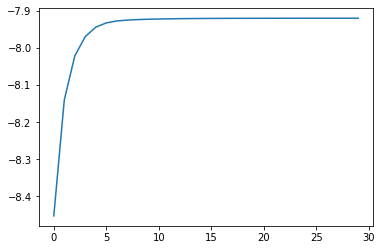

In [12]:
version = 1
filename = f'models/lin_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.LinearEstimator(**params_best)
model.fit(data_set)

integral = tensor([[0.8908]])
integral = tensor([[0.8908]])


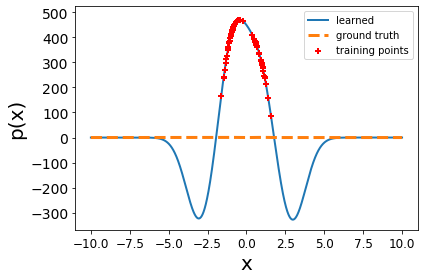

In [13]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

# Our model

In [58]:
#Model

In [59]:
model = utils.QuadraticEstimator

In [60]:
#Data set 

In [61]:
X = data_set 

In [62]:
#Last version : 

In [63]:
last_version = utils_train.find_last_version(save_path,model = model,extension='pickle')
print(f'Last version to date : {last_version}')

Last version to date : 7


In [64]:
fixed_params = {
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base,
            #'mu' : 1e-5
            'la' : 0
           }
variable_params = {
    'sigma' : ['uniform',0.2,0.8],
    'la' : ['loguniform',1e-2,1e2],
    'mu' : ['loguniform',1e-5,1e0]
}

cv = 5
prune = True
n_trials =  30


n_jobs = 1
eta = 0



sigma = 0.6225889746979485, lambda = 0.9846088648357814, mu = 5.907958555809016e-05
Integral tracker values : 2300,658


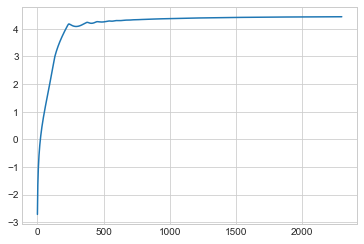

integral = 1.001168040324834
renorm size 2.810475185635571e-10
sigma = 0.6225889746979485, lambda = 0.9846088648357814, mu = 5.907958555809016e-05
Integral tracker values : 2300,627


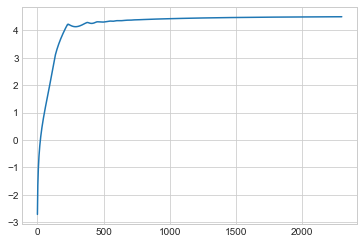

integral = 0.9990146256329864
renorm size 2.8430707932772436e-10
sigma = 0.6225889746979485, lambda = 0.9846088648357814, mu = 5.907958555809016e-05
Integral tracker values : 2300,646


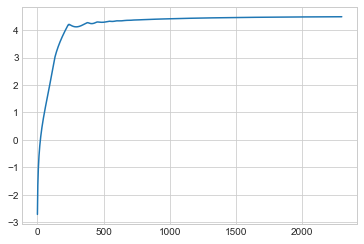

integral = 1.0020569530858259
renorm size 2.8637461385618493e-10
sigma = 0.6225889746979485, lambda = 0.9846088648357814, mu = 5.907958555809016e-05
Integral tracker values : 2300,615


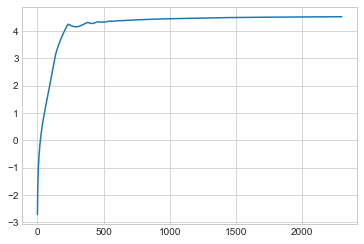

integral = 0.9979058939859324
renorm size 2.854803971217708e-10
sigma = 0.6225889746979485, lambda = 0.9846088648357814, mu = 5.907958555809016e-05
Integral tracker values : 2300,601


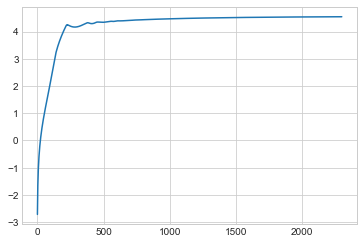

integral = 1.0003917494377663
renorm size 2.8937022719757153e-10
servelastsplit
4.893636719324581
[5.10074585 4.88143214 4.91875515 4.82985528 4.73739517]
endservelastsplit
here we are 
4.893636719324581
[5.10074585 4.88143214 4.91875515 4.82985528 4.73739517]
sigma = 0.7532146137091023, lambda = 0.0828864992130512, mu = 0.0036439792547723732
Finished after 450 iterations
Integral tracker values : 450,418


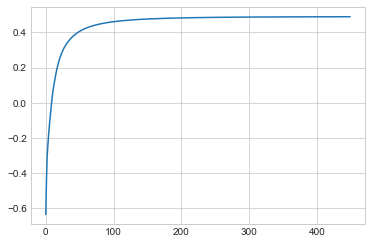

integral = 1.0000018897184433
renorm size 1.5995698635826453e-09
sigma = 0.7532146137091023, lambda = 0.0828864992130512, mu = 0.0036439792547723732
Finished after 495 iterations
Integral tracker values : 495,465


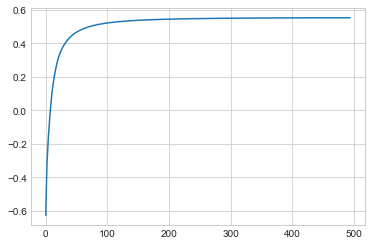

integral = 1.0000051915639814
renorm size 1.6135014909913113e-09
sigma = 0.7532146137091023, lambda = 0.0828864992130512, mu = 0.0036439792547723732
Finished after 475 iterations
Integral tracker values : 475,442


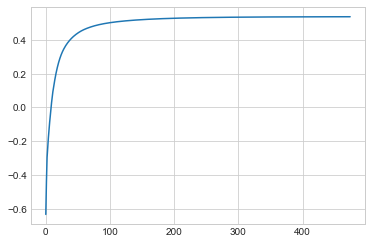

integral = 1.0000030590433069
renorm size 1.624541135048093e-09
sigma = 0.7532146137091023, lambda = 0.0828864992130512, mu = 0.0036439792547723732
Finished after 480 iterations
Integral tracker values : 480,449


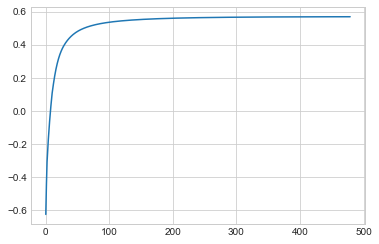

integral = 0.9999887154701657
renorm size 1.6165237588926596e-09
sigma = 0.7532146137091023, lambda = 0.0828864992130512, mu = 0.0036439792547723732
Finished after 400 iterations
Integral tracker values : 400,343


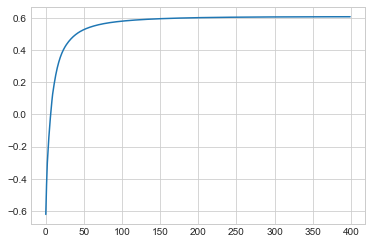

integral = 1.000008000130715
renorm size 1.634269295651834e-09
servelastsplit
5.025800173190949
[5.28122256 5.01463907 5.07701724 4.95358321 4.80253879]
endservelastsplit
here we are 
5.025800173190949
[5.28122256 5.01463907 5.07701724 4.95358321 4.80253879]
sigma = 0.3164928737988497, lambda = 13.452389436082889, mu = 1.0123836615783718e-05
Integral tracker values : 4141,2823


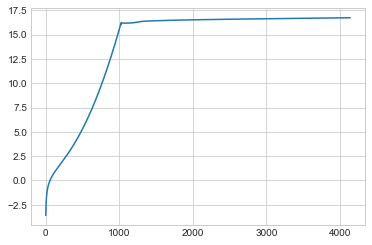

integral = 1.0006639509059585
renorm size 1.6367422974578212e-11
sigma = 0.3164928737988497, lambda = 13.452389436082889, mu = 1.0123836615783718e-05
Integral tracker values : 4141,2801


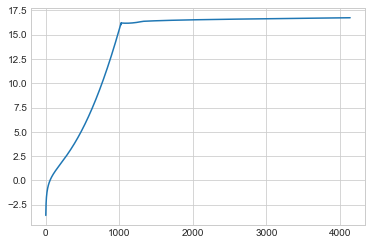

integral = 1.0006290941583735
renorm size 1.700789828116929e-11
here we are 
8.349475849384056
[8.81475067 8.21674531]
sigma = 0.6009018008069913, lambda = 0.0658331516382577, mu = 0.0003063642959209942
Integral tracker values : 1570,1298


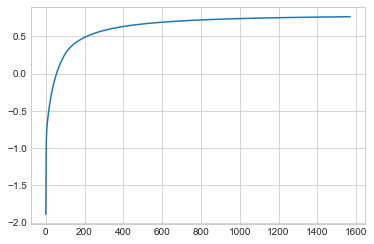

integral = 1.0001652711982087
renorm size 2.0332797281922234e-10
sigma = 0.6009018008069913, lambda = 0.0658331516382577, mu = 0.0003063642959209942
Integral tracker values : 1570,1302


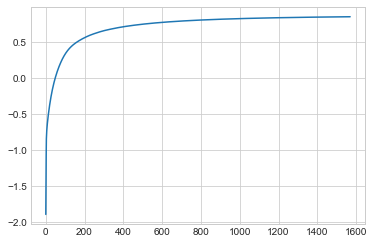

integral = 0.9997838202715252
renorm size 2.057967022900935e-10
sigma = 0.6009018008069913, lambda = 0.0658331516382577, mu = 0.0003063642959209942
Integral tracker values : 1570,1301


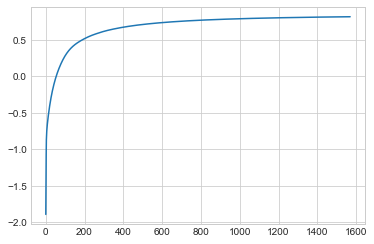

integral = 0.9999147931299677
renorm size 2.0724412116462887e-10
sigma = 0.6009018008069913, lambda = 0.0658331516382577, mu = 0.0003063642959209942
Integral tracker values : 1570,1411


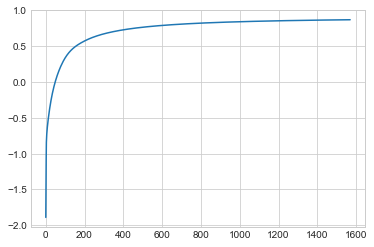

integral = 1.000188820764056
renorm size 2.0670715054850755e-10
sigma = 0.6009018008069913, lambda = 0.0658331516382577, mu = 0.0003063642959209942
Integral tracker values : 1570,1383


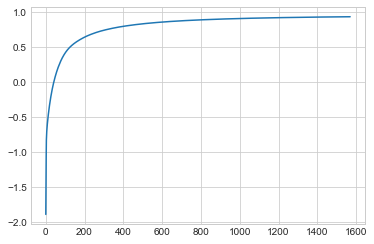

integral = 1.000004822066022
renorm size 2.0959528411677187e-10
servelastsplit
3.46295094520014
[3.85305057 3.44788308 3.54763108 3.36336165 3.10282834]
endservelastsplit
here we are 
3.46295094520014
[3.85305057 3.44788308 3.54763108 3.36336165 3.10282834]
sigma = 0.659263774529179, lambda = 1.7901446736775748, mu = 2.1574312752584065e-05
Finished after 603 iterations
Integral tracker values : 603,101


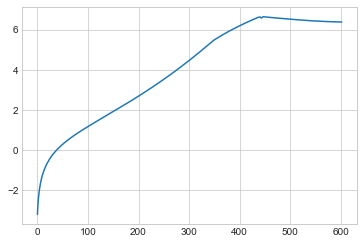

integral = 1.0023908634046972
renorm size 4.737444558966925e-10
sigma = 0.659263774529179, lambda = 1.7901446736775748, mu = 2.1574312752584065e-05
Finished after 608 iterations
Integral tracker values : 608,102


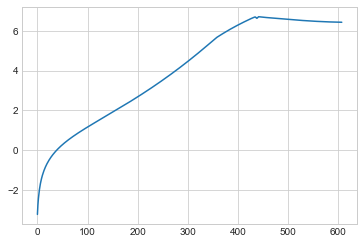

integral = 1.002638227974197
renorm size 4.788570142903223e-10
here we are 
8.020758885956738
[8.26162412 8.64852834]
sigma = 0.47775851330773483, lambda = 85.32014536082558, mu = 8.624402179269399e-05
Finished after 1640 iterations
Integral tracker values : 1640,299


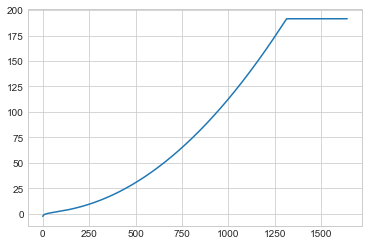

integral = 0.9997997758940649
renorm size 2.5293837047682745e-11
sigma = 0.47775851330773483, lambda = 85.32014536082558, mu = 8.624402179269399e-05
Finished after 1635 iterations
Integral tracker values : 1635,295


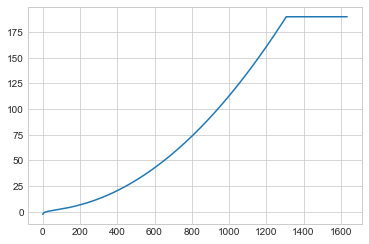

integral = 0.9999401127206718
renorm size 2.571409670364882e-11
here we are 
4.742134320808145
[5.08781872 4.91001509]
sigma = 0.3960376733434642, lambda = 9.551923407802532, mu = 2.7428763294491536e-05
Integral tracker values : 2908,2299


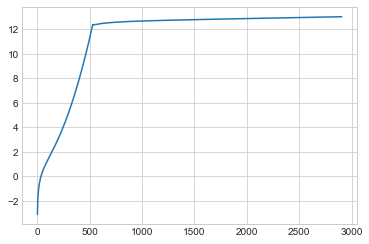

integral = 1.0011676688411906
renorm size 1.2608184743214905e-11
sigma = 0.3960376733434642, lambda = 9.551923407802532, mu = 2.7428763294491536e-05
Integral tracker values : 2908,2318


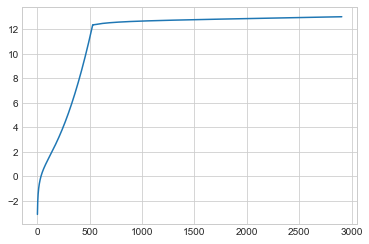

integral = 1.0010926617459723
renorm size 1.3036160234881959e-11
here we are 
5.8840739112655225
[6.36855593 6.0368272 ]
sigma = 0.6927299001732825, lambda = 3.0343493075130725, mu = 0.7243800806028771
Finished after 70 iterations
Integral tracker values : 70,64


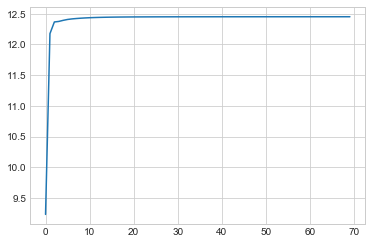

integral = 1.0000012480874323
renorm size 7.452091086007746e-10
sigma = 0.6927299001732825, lambda = 3.0343493075130725, mu = 0.7243800806028771
Finished after 65 iterations
Integral tracker values : 65,59


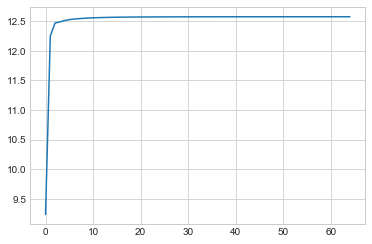

integral = 1.0000019334756471
renorm size 7.525271714289806e-10
here we are 
5.726361813797595
[6.10544317 5.96743581]
sigma = 0.48630038139171267, lambda = 13.577952601247521, mu = 0.037186032151186744
Finished after 35 iterations
Integral tracker values : 35,10


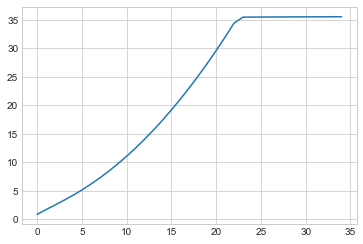

integral = 1.0005332904529483
renorm size 2.947049823440389e-11
sigma = 0.48630038139171267, lambda = 13.577952601247521, mu = 0.037186032151186744
Finished after 40 iterations
Integral tracker values : 40,15


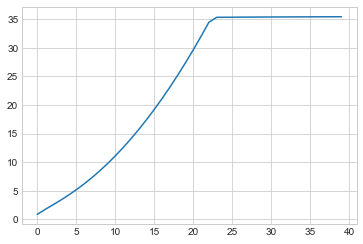

integral = 1.0005562862431012
renorm size 2.9936902824515453e-11
here we are 
4.430015929527142
[4.78031376 4.55948137]
sigma = 0.3316273756088712, lambda = 0.12108906899664466, mu = 0.08012759004078676
Finished after 340 iterations
Integral tracker values : 340,337


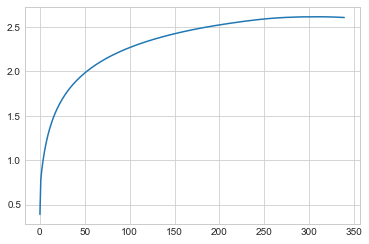

integral = 1.000938694804991
renorm size 1.5650633426980263e-11
sigma = 0.3316273756088712, lambda = 0.12108906899664466, mu = 0.08012759004078676
Finished after 334 iterations
Integral tracker values : 334,331


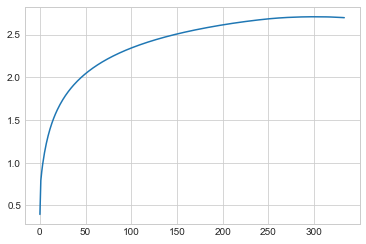

integral = 0.999245565681109
renorm size 1.624276132806369e-11
here we are 
4.7350875620524
[5.41743329 4.56554385]
sigma = 0.21454335762122206, lambda = 0.010993528348659748, mu = 0.0005796296562916732
Integral tracker values : 1414,0


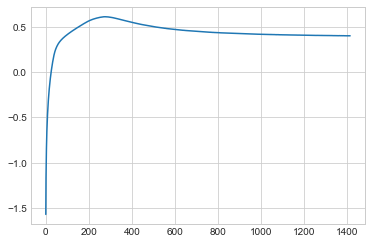

integral = 1.2262008798777413
renorm size 1.909921994784272e-11
sigma = 0.21454335762122206, lambda = 0.010993528348659748, mu = 0.0005796296562916732
Integral tracker values : 1414,0


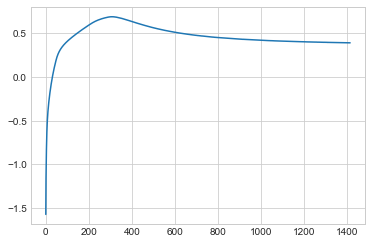

integral = 1.5950257537872043
renorm size 1.984428337051285e-11
here we are 
7.421641902178105
[8.69604803 6.95098711]
sigma = 0.5454104314518522, lambda = 94.56980143312282, mu = 0.013691668989233116
Finished after 160 iterations
Integral tracker values : 160,33


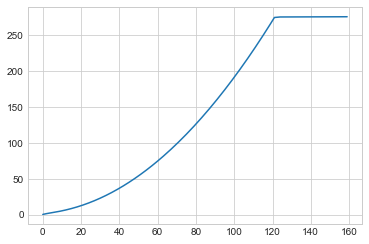

integral = 1.0048731403383362
renorm size 8.367538228761414e-11
sigma = 0.5454104314518522, lambda = 94.56980143312282, mu = 0.013691668989233116
Finished after 160 iterations
Integral tracker values : 160,36


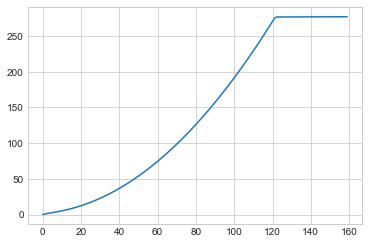

integral = 1.0044012079358342
renorm size 8.480160574386422e-11
here we are 
5.480517283496201
[5.77781698 5.77674839]
sigma = 0.5218477007475263, lambda = 0.01624464728712789, mu = 0.06615344073320575
Finished after 100 iterations
Integral tracker values : 100,87


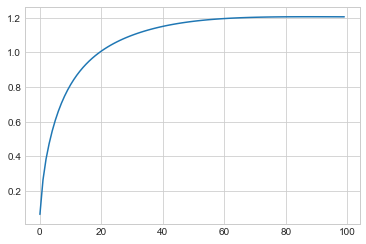

integral = 0.9997986737957738
renorm size 5.5770184884214265e-11
sigma = 0.5218477007475263, lambda = 0.01624464728712789, mu = 0.06615344073320575
Finished after 95 iterations
Integral tracker values : 95,80


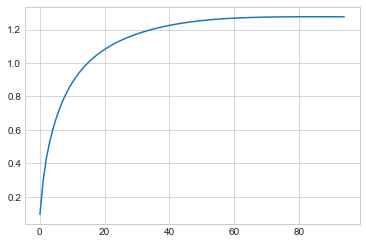

integral = 0.999805837271958
renorm size 5.655181016606221e-11
sigma = 0.5218477007475263, lambda = 0.01624464728712789, mu = 0.06615344073320575
Finished after 95 iterations
Integral tracker values : 95,40


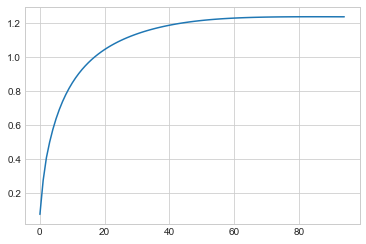

integral = 0.9998029273373529
renorm size 5.681442550134011e-11
sigma = 0.5218477007475263, lambda = 0.01624464728712789, mu = 0.06615344073320575
Finished after 105 iterations
Integral tracker values : 105,91


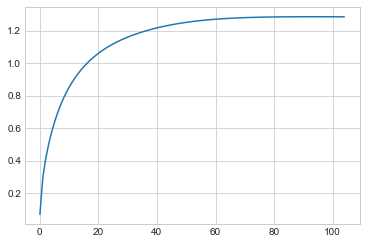

integral = 0.9997874925759818
renorm size 5.685053201175703e-11
sigma = 0.5218477007475263, lambda = 0.01624464728712789, mu = 0.06615344073320575
Finished after 105 iterations
Integral tracker values : 105,91


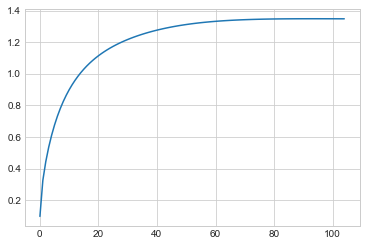

integral = 0.9998218252745635
renorm size 5.7662634039302847e-11
servelastsplit
3.3343655181137386
[3.73784931 3.30500872 3.45293628 3.25708424 2.91894903]
endservelastsplit
here we are 
3.3343655181137386
[3.73784931 3.30500872 3.45293628 3.25708424 2.91894903]
sigma = 0.6018155284960947, lambda = 0.013447981662593441, mu = 0.0008227233329748605
Integral tracker values : 1347,0


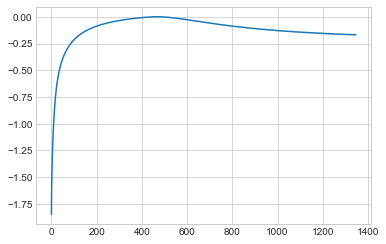

integral = 4.350983137166903
renorm size 2.0617045084727157e-10
sigma = 0.6018155284960947, lambda = 0.013447981662593441, mu = 0.0008227233329748605
Integral tracker values : 1347,0


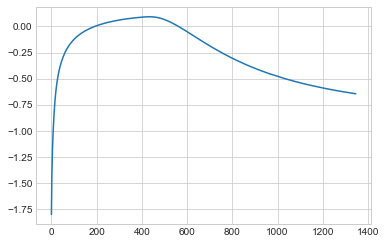

integral = 13.607171363327364
renorm size 2.0866899736674686e-10
sigma = 0.6018155284960947, lambda = 0.013447981662593441, mu = 0.0008227233329748605
Integral tracker values : 1347,0


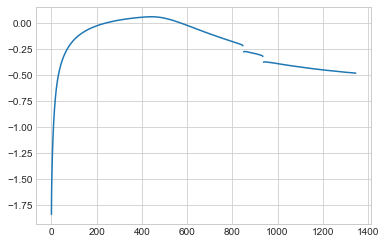

integral = 9.670272492648259
renorm size 2.101392957072565e-10
sigma = 0.6018155284960947, lambda = 0.013447981662593441, mu = 0.0008227233329748605
Integral tracker values : 1347,0


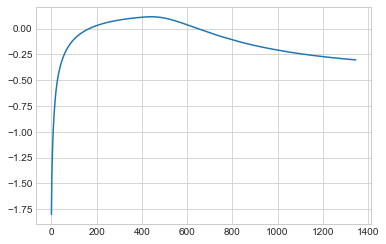

integral = 8.69395960193457
renorm size 2.0958965790155837e-10
sigma = 0.6018155284960947, lambda = 0.013447981662593441, mu = 0.0008227233329748605
Integral tracker values : 1347,0


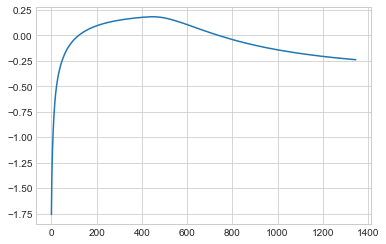

integral = 9.140653864765795
renorm size 2.1251537513808426e-10
servelastsplit
2.9981560896914226
[3.9726566  2.74953823 2.86170518 2.90761566 2.49926478]
endservelastsplit
here we are 
2.9981560896914226
[3.9726566  2.74953823 2.86170518 2.90761566 2.49926478]
sigma = 0.5559147354141377, lambda = 0.011061078545098156, mu = 0.5814767982718664
Finished after 45 iterations
Integral tracker values : 45,34


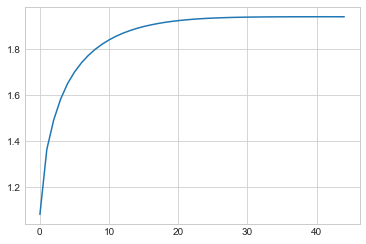

integral = 0.9999390880308788
renorm size 9.969847384739205e-11
sigma = 0.5559147354141377, lambda = 0.011061078545098156, mu = 0.5814767982718664
Finished after 45 iterations
Integral tracker values : 45,34


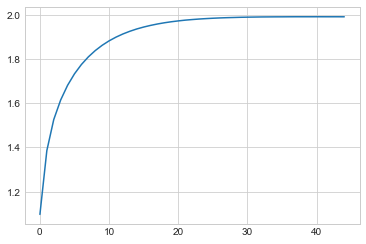

integral = 0.9995150296720237
renorm size 1.0101660973943896e-10
here we are 
3.921912880345908
[4.55213663 4.24122227]
sigma = 0.7912744842694126, lambda = 0.029208001008219048, mu = 0.001178754266376728
Finished after 480 iterations
Integral tracker values : 480,413


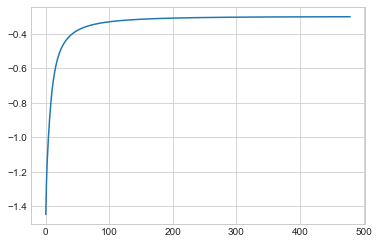

integral = 1.0000399887659217
renorm size 2.509863420000154e-09
sigma = 0.7912744842694126, lambda = 0.029208001008219048, mu = 0.001178754266376728
Finished after 595 iterations
Integral tracker values : 595,554


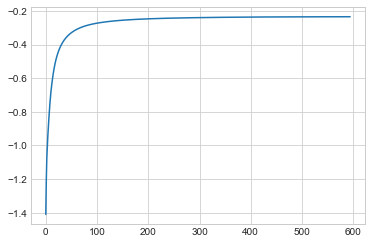

integral = 1.000009144243573
renorm size 2.529852438641579e-09
here we are 
4.405500942165463
[5.07939376 4.79822261]
sigma = 0.4343074234489864, lambda = 0.3329402126897412, mu = 0.15850043993339627
Finished after 565 iterations
Integral tracker values : 565,562


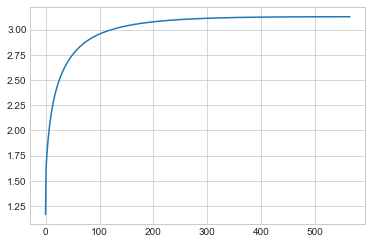

integral = 1.000000474070748
renorm size 1.3680259463634327e-11
sigma = 0.4343074234489864, lambda = 0.3329402126897412, mu = 0.15850043993339627
Finished after 588 iterations
Integral tracker values : 588,585


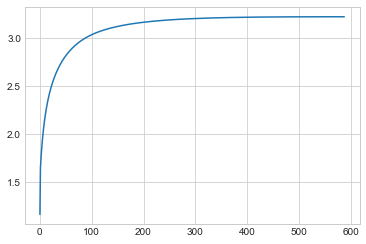

integral = 0.9999957411303932
renorm size 1.403855655907826e-11
here we are 
3.3107286328151475
[3.97328893 3.44972783]
sigma = 0.4573371605276998, lambda = 0.3524119626755496, mu = 0.007166503966750252
Integral tracker values : 1117,1102


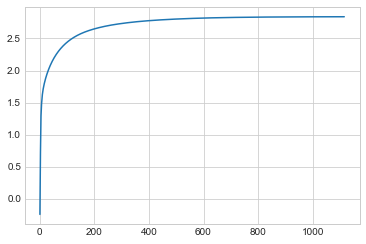

integral = 0.9999921352430925
renorm size 1.799344093495468e-11
sigma = 0.4573371605276998, lambda = 0.3524119626755496, mu = 0.007166503966750252
Integral tracker values : 1117,1101


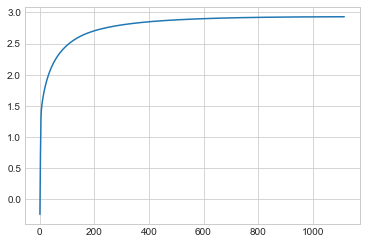

integral = 1.000004609857793
renorm size 1.835246250892086e-11
sigma = 0.4573371605276998, lambda = 0.3524119626755496, mu = 0.007166503966750252
Integral tracker values : 1117,1094


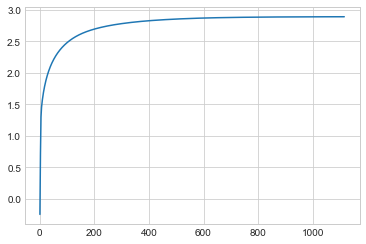

integral = 0.9999876166625336
renorm size 1.8371210468078074e-11
here we are 
3.176885076837849
[3.66720848 3.170838   3.31717827]
sigma = 0.3801122296783811, lambda = 0.37873200434467397, mu = 0.005097384507995354


In [ ]:
r = utils_train.perform_study(model, X,fixed_params = fixed_params, variable_params = variable_params ,cv= cv, prune = prune,
                  n_trials = n_trials,save_path = save_path,version = None,eta = 0,n_jobs = 1)

In [ ]:
version = None
df,best_params,aux = utils_train.get_results(save_path,model = model,version = version)
display(df)

In [30]:
eta = 0
params = aux(eta)
print(params)

{'sigma': 0.6, 'la': 0.5113643242487619, 'mu': 0.04058219645680331, 'Niter': 'auto', 'mu_base': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'eta_base': 5}


In [34]:
params['sigma'] = 0.45
params['la'] = 0.02
params['mu'] = 3e-5
params['Niter'] = 10000

In [35]:
clf = model(**params)
clf.fit(X)

sigma = 0.45, lambda = 0.02, mu = 3e-05


KeyboardInterrupt: 

In [ ]:
#xtest = torch.linspace(-,5,3000)
c,rad,ntest = 0,4,10000
rad2 = 2


xtest2 = gentest(ntest,c,rad)
xtest = torch.zeros((ntest//2,d))


xtest[:,0] = c + rad*(2*torch.rand(ntest//2) - 1)
#xtest[:,1:] = c + rad2*(2*torch.rand((ntest//2,d-1)) - 1)

ytest = clf.predict(xtest)
ytest2 = clf.predict(xtest2)
print((ytest < 0).sum())
print(ytest.sum()*(2*rad)*(2*rad2)**(d-1)/ntest)
ydata_set = clf.predict(data_set)



xdata = data_set


xhaha = torch.linspace(-rad,rad,200)
yhaha = 0.5*(torch.exp(-(xhaha-r_data)**2/(2*sigma_data**2)) +torch.exp(-(xhaha+r_data)**2/(2*sigma_data**2)) )




#xtest = torch.load(pt_path+'xtest_linear0.pt')
#ytest = torch.load(pt_path+'ytest_linear0.pt')
#xdata = torch.load(pt_path+'xdataExperiments.pt')
#ydata_set = torch.load(pt_path+'ydata_linear0.pt')


#ytestref = density_fun(xtest)



fig = plt.figure()
plt.scatter(xtest[:,0],ytest[:],lw = 1.5,label='learned projection',zorder = -1,marker = '+',color = 'b')
plt.scatter(xtest2[:,0],ytest2[:],lw = 1.5,zorder = -1,marker = '+',color = 'b')
plt.plot(xhaha,yhaha,lw = 3,linestyle = 'dashed',label = 'ground truth',color = 'orange')
#plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
#plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(-0.1,1)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=100)
plt.show()

# Nadaraya Watson

In [43]:
#Model

In [44]:
model = utils.NadarayaWatsonEstimator

In [45]:
#Data set 

In [46]:
X = data_set 

In [47]:
#Last version : 

In [48]:
last_version = utils_train.find_last_version(save_path,model = model,extension='pickle')
print(f'Last version to date : {last_version}')

Last version to date : 0


In [49]:
fixed_params = {
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base
           }
variable_params = {
    'sigma' : ['uniform',1e-1,1e0],
    'la' : ['loguniform',1e-7,1e0]
}


cv = 5
prune = True
n_trials =  20


n_jobs = 1
eta = 0



sigma = 0.9711442841908647, lambda = 0.013320761380301183
 norm of the constraint : 1.159034547516964e-06
Finished after 165 iterations


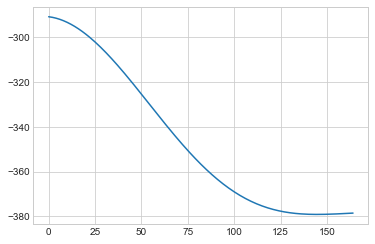

integral = tensor([[1.0000]])
sigma = 0.9711442841908647, lambda = 0.013320761380301183
 norm of the constraint : 1.1581915807971185e-06
Finished after 165 iterations


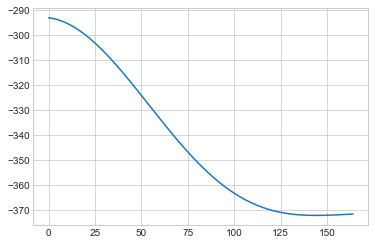

integral = tensor([[1.0000]])
sigma = 0.9711442841908647, lambda = 0.013320761380301183
 norm of the constraint : 1.1594534714977057e-06
Finished after 165 iterations


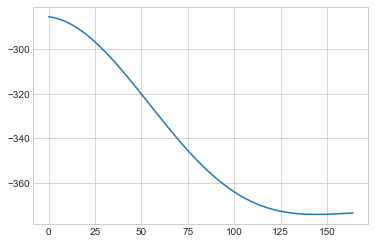

integral = tensor([[1.0000]])
sigma = 0.9711442841908647, lambda = 0.013320761380301183
 norm of the constraint : 1.1589718242947013e-06
Finished after 165 iterations


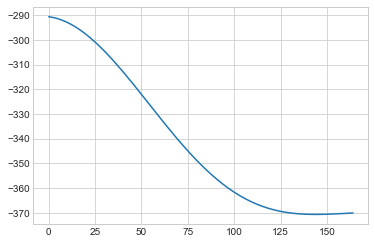

integral = tensor([[1.0000]])
sigma = 0.9711442841908647, lambda = 0.013320761380301183
 norm of the constraint : 1.1593047693028527e-06
Finished after 165 iterations


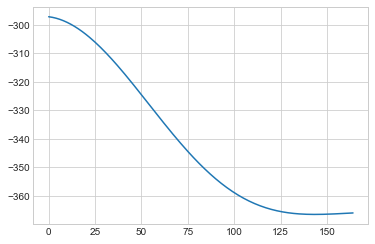

integral = tensor([[1.0000]])
servelastsplit
10.214194929084083
[10.27286845 10.20875778 10.22345421 10.19655112 10.16934308]
endservelastsplit
here we are 
10.214194929084083
[10.27286845 10.20875778 10.22345421 10.19655112 10.16934308]
sigma = 0.9100871483166407, lambda = 6.557110964738063e-06
 norm of the constraint : 6.18798370447301e-07
Finished after 18440 iterations


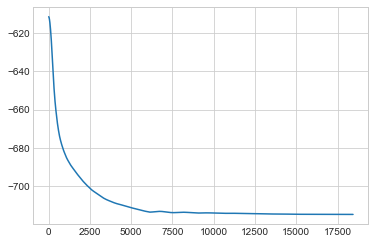

integral = tensor([[1.]])
sigma = 0.9100871483166407, lambda = 6.557110964738063e-06
 norm of the constraint : 6.183464458528944e-07
Finished after 37415 iterations


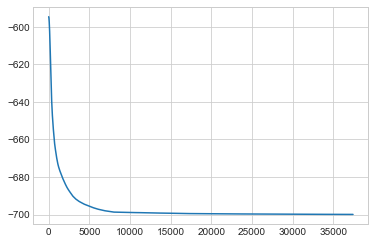

integral = tensor([[1.0000]])
sigma = 0.9100871483166407, lambda = 6.557110964738063e-06
 norm of the constraint : 6.190228956534105e-07
Finished after 19280 iterations


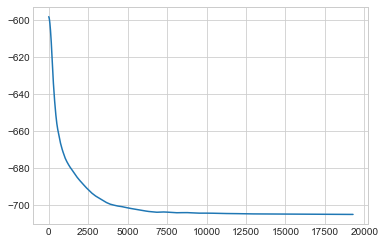

integral = tensor([[1.0000]])
sigma = 0.9100871483166407, lambda = 6.557110964738063e-06
 norm of the constraint : 6.187647780257386e-07
Finished after 13046 iterations


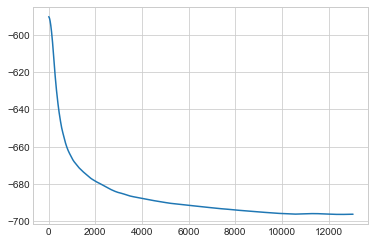

integral = tensor([[1.]])
sigma = 0.9100871483166407, lambda = 6.557110964738063e-06
 norm of the constraint : 6.189432423762047e-07
Finished after 25185 iterations


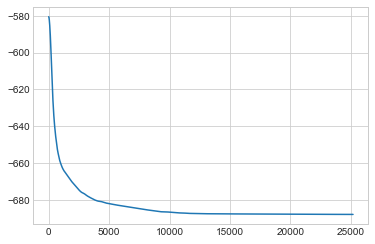

integral = tensor([[1.]])
servelastsplit
9.333642522937629
[9.46063025 9.30872488 9.36273902 9.30534281 9.23077566]
endservelastsplit
here we are 
9.333642522937629
[9.46063025 9.30872488 9.36273902 9.30534281 9.23077566]
sigma = 0.9072024507733475, lambda = 0.0006974377560417912
 norm of the constraint : 6.00059420157616e-07
Finished after 20080 iterations


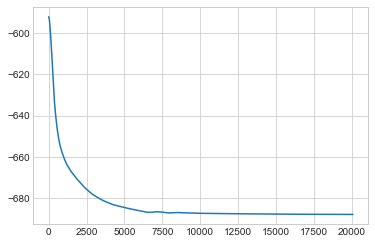

integral = tensor([[1.]])
sigma = 0.9072024507733475, lambda = 0.0006974377560417912
 norm of the constraint : 5.996210978952635e-07
Finished after 23915 iterations


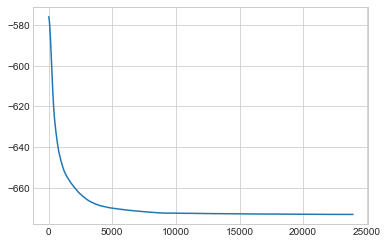

integral = tensor([[1.0000]])
sigma = 0.9072024507733475, lambda = 0.0006974377560417912
 norm of the constraint : 6.00277184563332e-07
Finished after 20905 iterations


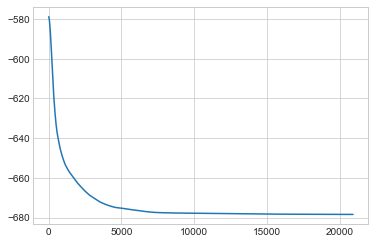

integral = tensor([[1.]])
sigma = 0.9072024507733475, lambda = 0.0006974377560417912
 norm of the constraint : 6.000268403479195e-07
Finished after 14725 iterations


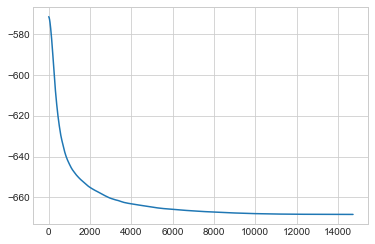

integral = tensor([[1.]])
sigma = 0.9072024507733475, lambda = 0.0006974377560417912
 norm of the constraint : 6.001999317585833e-07
Finished after 15310 iterations


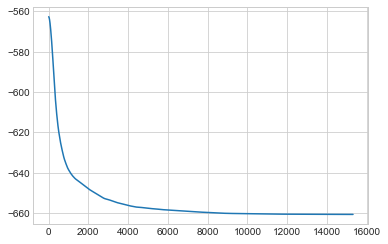

integral = tensor([[1.]])
servelastsplit
9.309102004078039
[9.43209997 9.28251683 9.33516019 9.28072515 9.21500788]
endservelastsplit
here we are 
9.309102004078039
[9.43209997 9.28251683 9.33516019 9.28072515 9.21500788]
sigma = 0.5076825910592748, lambda = 2.485578011436632e-07
 norm of the constraint : 2.0148966800819263e-09
Finished after 15740 iterations


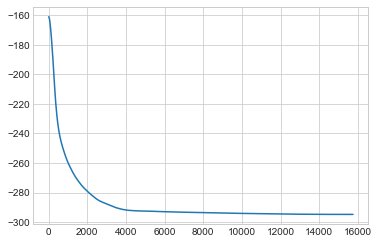

integral = tensor([[1.]])
sigma = 0.5076825910592748, lambda = 2.485578011436632e-07
 norm of the constraint : 2.0133941079821207e-09
Finished after 30783 iterations


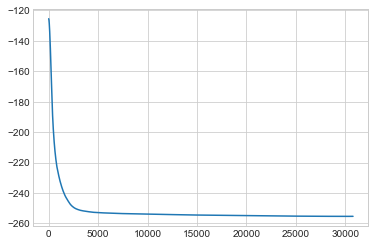

integral = tensor([[1.0000]])
sigma = 0.5076825910592748, lambda = 2.485578011436632e-07
 norm of the constraint : 2.0156420875961915e-09
Finished after 15835 iterations


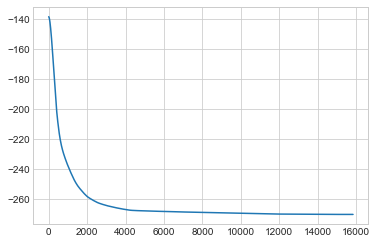

integral = tensor([[1.]])
sigma = 0.5076825910592748, lambda = 2.485578011436632e-07
 norm of the constraint : 2.014785574641421e-09
Finished after 17135 iterations


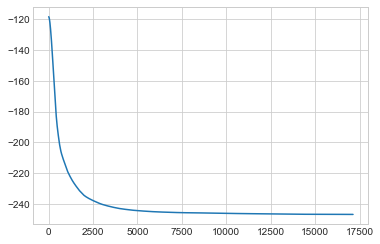

integral = tensor([[1.]])
sigma = 0.5076825910592748, lambda = 2.485578011436632e-07
 norm of the constraint : 2.0153784054559477e-09
Finished after 20370 iterations


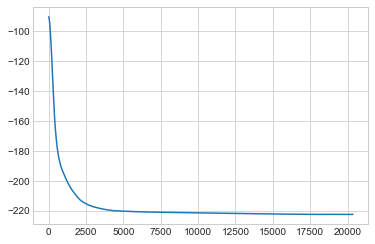

integral = tensor([[1.0000]])
servelastsplit
4.781572372865845
[5.16107584 4.71493372 4.87105954 4.68574263 4.47505013]
endservelastsplit
here we are 
4.781572372865845
[5.16107584 4.71493372 4.87105954 4.68574263 4.47505013]
sigma = 0.5361077473502105, lambda = 0.14709460792116757
 norm of the constraint : 3.454212024790076e-09
Finished after 70 iterations


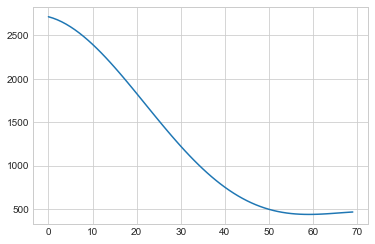

integral = tensor([[1.0000]])
sigma = 0.5361077473502105, lambda = 0.14709460792116757
 norm of the constraint : 3.4516389321708217e-09
Finished after 70 iterations


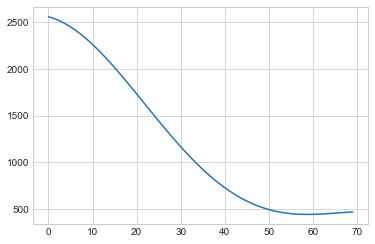

integral = tensor([[1.0000]])
here we are 
6.11056250539505
[6.36899748 6.25194999]
sigma = 0.14527444938164544, lambda = 0.001191238267736994
 norm of the constraint : 1.8715245937680353e-12
Finished after 7470 iterations


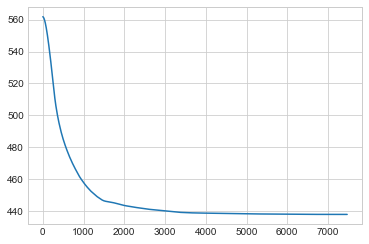

integral = tensor([[1.0000]])
sigma = 0.14527444938164544, lambda = 0.001191238267736994
 norm of the constraint : 1.8715245937680353e-12
Finished after 7935 iterations


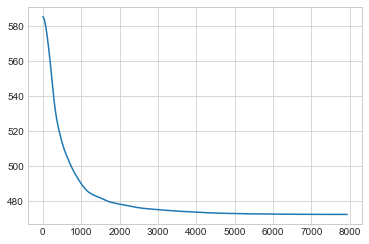

integral = tensor([[1.0000]])
here we are 
7.90996486775248
[9.05398033 7.28350922]
sigma = 0.4878861991662835, lambda = 4.700478520173382e-06
 norm of the constraint : 1.3588731823251164e-09
Finished after 15420 iterations


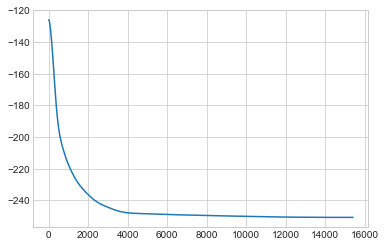

integral = tensor([[1.0000]])
sigma = 0.4878861991662835, lambda = 4.700478520173382e-06
 norm of the constraint : 1.3578590887829898e-09
Finished after 30620 iterations


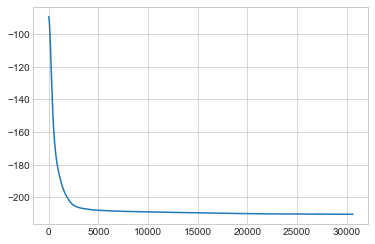

integral = tensor([[1.0000]])
sigma = 0.4878861991662835, lambda = 4.700478520173382e-06
 norm of the constraint : 1.3593762354211954e-09
Finished after 15425 iterations


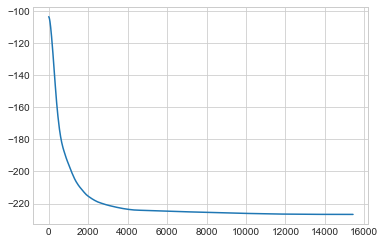

integral = tensor([[1.0000]])
sigma = 0.4878861991662835, lambda = 4.700478520173382e-06
 norm of the constraint : 1.358798210678619e-09
Finished after 16915 iterations


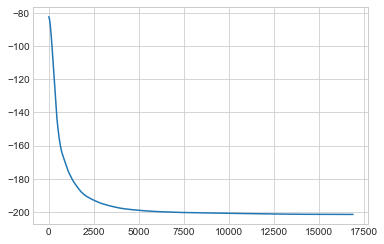

integral = tensor([[1.0000]])
sigma = 0.4878861991662835, lambda = 4.700478520173382e-06
 norm of the constraint : 1.359198302520902e-09
Finished after 20210 iterations


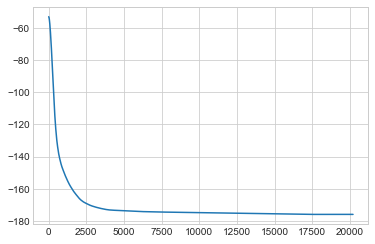

integral = tensor([[1.0000]])
servelastsplit
4.527493961368713
[4.93707251 4.45684409 4.62725246 4.42082367 4.19547708]
endservelastsplit
here we are 
4.527493961368713
[4.93707251 4.45684409 4.62725246 4.42082367 4.19547708]
sigma = 0.7310099268365052, lambda = 2.1200248468058405e-05
 norm of the constraint : 7.31723165312595e-08
Finished after 19505 iterations


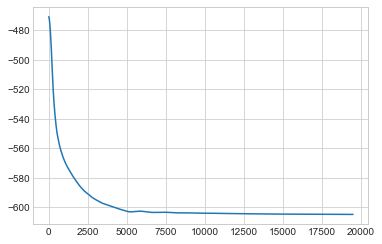

integral = tensor([[1.]])
sigma = 0.7310099268365052, lambda = 2.1200248468058405e-05
 norm of the constraint : 7.311830205996307e-08
Finished after 9100 iterations


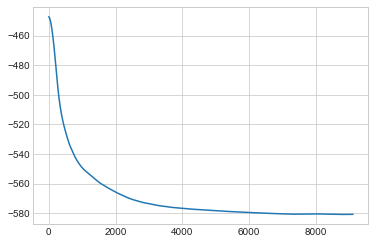

integral = tensor([[1.]])
here we are 
7.298510677859962
[7.68445727 7.45893137]
sigma = 0.40202311030043036, lambda = 0.0016339123170984746
 norm of the constraint : 1.9905144526744476e-10
Finished after 13720 iterations


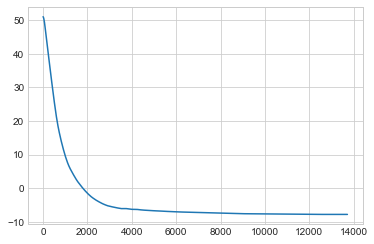

integral = tensor([[1.0000]])
sigma = 0.40202311030043036, lambda = 0.0016339123170984746
 norm of the constraint : 1.989024769714632e-10
Finished after 16283 iterations


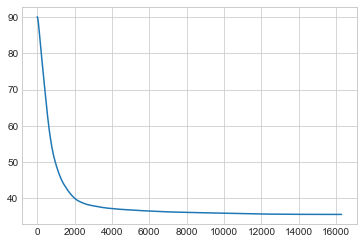

integral = tensor([[1.0000]])
sigma = 0.40202311030043036, lambda = 0.0016339123170984746
 norm of the constraint : 1.9912532776528526e-10
Finished after 13590 iterations


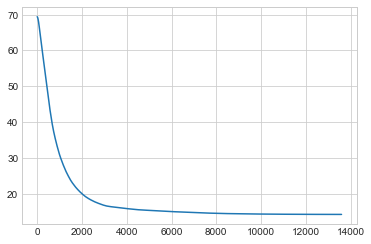

integral = tensor([[1.0000]])
sigma = 0.40202311030043036, lambda = 0.0016339123170984746
 norm of the constraint : 1.990404400811097e-10
Finished after 14960 iterations


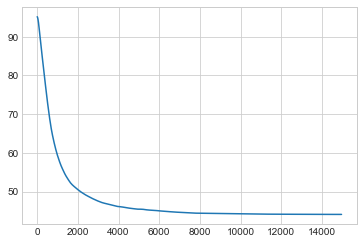

integral = tensor([[1.0000]])
sigma = 0.40202311030043036, lambda = 0.0016339123170984746
 norm of the constraint : 1.990992055157549e-10
Finished after 15505 iterations


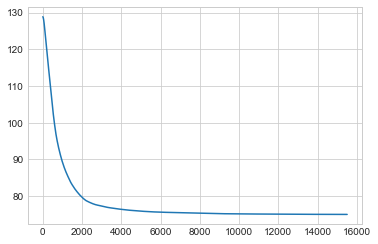

integral = tensor([[1.]])
servelastsplit
3.47825733081377
[3.98094096 3.42059685 3.6508394  3.33825766 3.00065178]
endservelastsplit
here we are 
3.47825733081377
[3.98094096 3.42059685 3.6508394  3.33825766 3.00065178]
sigma = 0.852849600203782, lambda = 0.00010001686562173537
 norm of the constraint : 3.294496366984312e-07
Finished after 18340 iterations


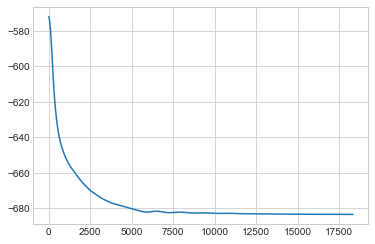

integral = tensor([[1.]])
sigma = 0.852849600203782, lambda = 0.00010001686562173537
 norm of the constraint : 3.292081486134552e-07
Finished after 35445 iterations


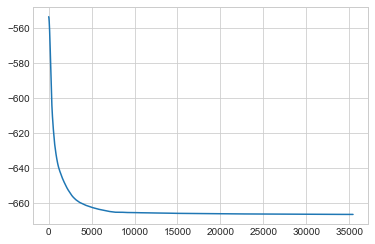

integral = tensor([[1.]])
here we are 
8.303451321598603
[8.91968179 8.74960001]
sigma = 0.2571583068331757, lambda = 0.28222243592593754
 norm of the constraint : 2.3257499597254147e-12
Finished after 70 iterations


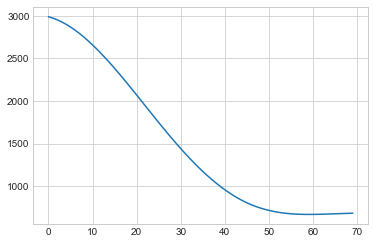

integral = tensor([[1.0000]])
sigma = 0.2571583068331757, lambda = 0.28222243592593754
 norm of the constraint : 2.3240032013187715e-12
Finished after 70 iterations


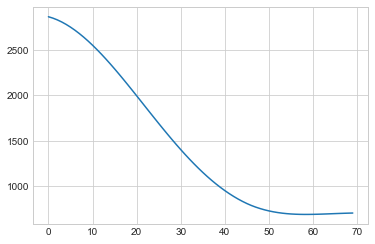

integral = tensor([[1.0000]])
sigma = 0.2571583068331757, lambda = 0.28222243592593754
 norm of the constraint : 2.326616063115848e-12
Finished after 70 iterations


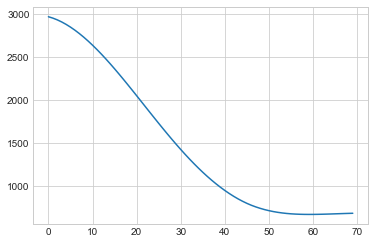

integral = tensor([[1.0000]])
sigma = 0.2571583068331757, lambda = 0.28222243592593754
 norm of the constraint : 2.3256210342823625e-12
Finished after 70 iterations


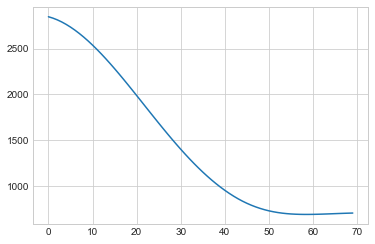

integral = tensor([[1.0000]])
sigma = 0.2571583068331757, lambda = 0.28222243592593754
 norm of the constraint : 2.326309993568789e-12
Finished after 68 iterations


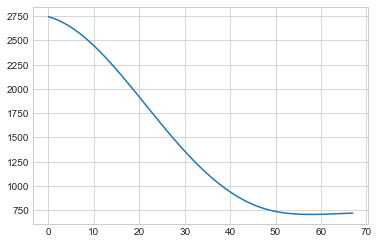

integral = tensor([[1.0000]])
servelastsplit
2.364481169320129
[2.93866115 2.29482072 2.55497611 2.27905988 1.754888  ]
endservelastsplit
here we are 
2.364481169320129
[2.93866115 2.29482072 2.55497611 2.27905988 1.754888  ]
sigma = 0.2415558320364215, lambda = 0.6043682781179843
 norm of the constraint : 1.8715245937680353e-12
Finished after 55 iterations


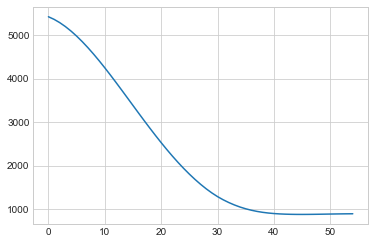

integral = tensor([[1.0000]])
sigma = 0.2415558320364215, lambda = 0.6043682781179843
 norm of the constraint : 1.8715245937680353e-12
Finished after 52 iterations


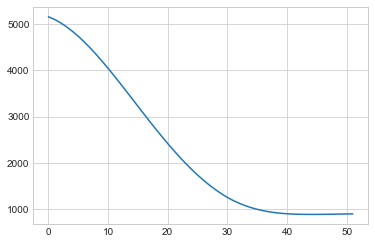

integral = tensor([[1.]])
here we are 
2.729396224139863
[3.37520387 2.6659716 ]
sigma = 0.14906596008640513, lambda = 0.7937362896435187
 norm of the constraint : 1.8715245937680353e-12
Finished after 80 iterations


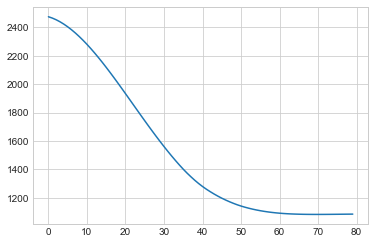

integral = tensor([[1.0000]])
sigma = 0.14906596008640513, lambda = 0.7937362896435187
 norm of the constraint : 1.8715245937680353e-12
Finished after 80 iterations


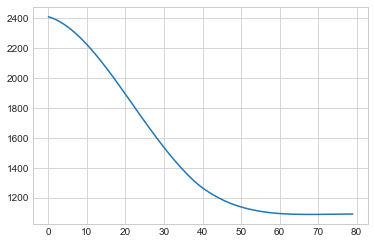

integral = tensor([[1.]])
here we are 
7.787015049126227
[9.38102373 7.85455529]
sigma = 0.310528115687659, lambda = 0.9237705758611985
 norm of the constraint : 1.5240274487428807e-11
Finished after 37 iterations


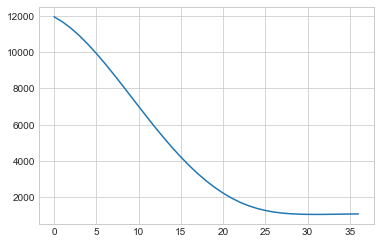

integral = tensor([[1.0000]])
sigma = 0.310528115687659, lambda = 0.9237705758611985
 norm of the constraint : 1.522884115043593e-11
Finished after 35 iterations


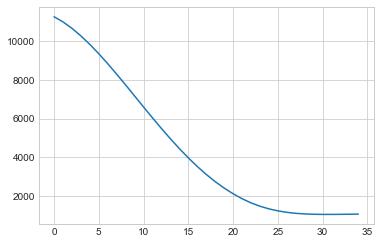

integral = tensor([[1.0000]])
here we are 
3.2361070118977944
[3.79241213 3.37030398]
sigma = 0.28309530895061596, lambda = 0.0868939765654993
 norm of the constraint : 6.063080658079626e-12
Finished after 105 iterations


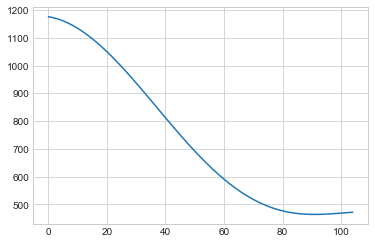

integral = tensor([[1.0000]])
sigma = 0.28309530895061596, lambda = 0.0868939765654993
 norm of the constraint : 6.058529345589895e-12
Finished after 105 iterations


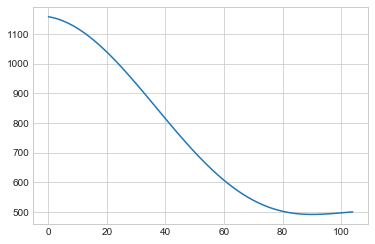

integral = tensor([[1.0000]])
sigma = 0.28309530895061596, lambda = 0.0868939765654993
 norm of the constraint : 6.065337441409562e-12
Finished after 105 iterations


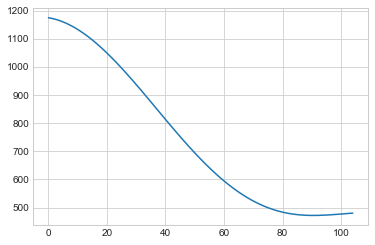

integral = tensor([[1.0000]])
sigma = 0.28309530895061596, lambda = 0.0868939765654993
 norm of the constraint : 6.06274468764769e-12
Finished after 105 iterations


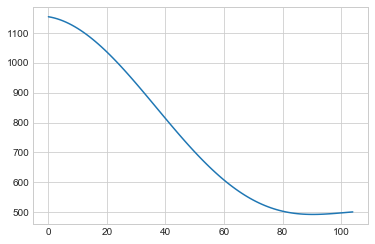

integral = tensor([[1.0000]])
sigma = 0.28309530895061596, lambda = 0.0868939765654993
 norm of the constraint : 6.064539864706191e-12
Finished after 104 iterations


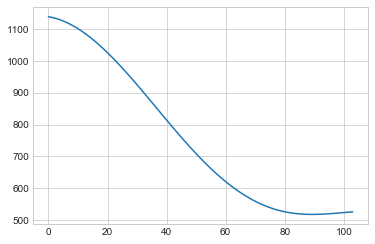

integral = tensor([[1.0000]])
servelastsplit
2.4435863207989748
[2.97496019 2.38304976 2.63138132 2.3584804  1.87005993]
endservelastsplit
here we are 
2.4435863207989748
[2.97496019 2.38304976 2.63138132 2.3584804  1.87005993]
sigma = 0.2827944704203799, lambda = 0.045965228130191015
 norm of the constraint : 5.999156799749148e-12
Finished after 135 iterations


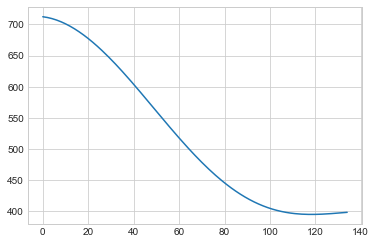

integral = tensor([[1.0000]])
sigma = 0.2827944704203799, lambda = 0.045965228130191015
 norm of the constraint : 5.994653443818381e-12
Finished after 135 iterations


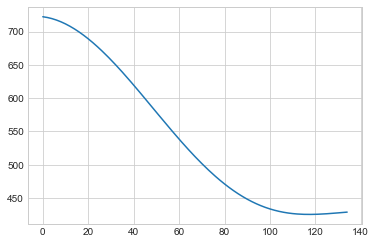

integral = tensor([[1.0000]])
sigma = 0.2827944704203799, lambda = 0.045965228130191015
 norm of the constraint : 6.001389802642406e-12
Finished after 135 iterations


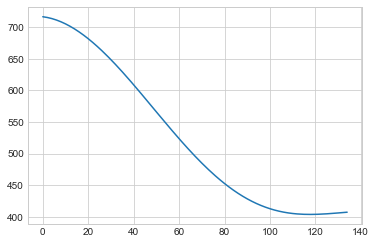

integral = tensor([[1.0000]])
sigma = 0.2827944704203799, lambda = 0.045965228130191015
 norm of the constraint : 5.998824369936514e-12
Finished after 135 iterations


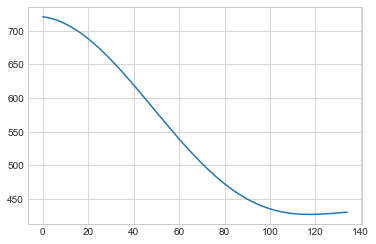

integral = tensor([[1.0000]])
sigma = 0.2827944704203799, lambda = 0.045965228130191015
 norm of the constraint : 6.000600630966595e-12
Finished after 135 iterations


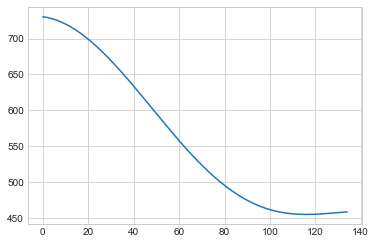

integral = tensor([[1.0000]])
servelastsplit
2.2906913539681995
[2.85302438 2.22317977 2.50128201 2.19782398 1.67814664]
endservelastsplit
here we are 
2.2906913539681995
[2.85302438 2.22317977 2.50128201 2.19782398 1.67814664]
sigma = 0.3592007437182231, lambda = 0.015005792947298351
 norm of the constraint : 6.495159739567664e-11
Finished after 188 iterations


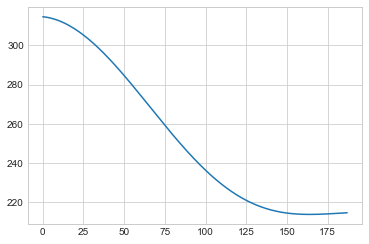

integral = tensor([[1.0000]])
sigma = 0.3592007437182231, lambda = 0.015005792947298351
 norm of the constraint : 6.49029293523552e-11
Finished after 185 iterations


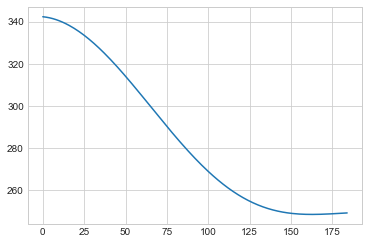

integral = tensor([[1.0000]])
here we are 
3.096992523692582
[3.66873758 3.19424126]
sigma = 0.6810885128231474, lambda = 0.016959155975242456
 norm of the constraint : 3.656302928442677e-08
Finished after 157 iterations


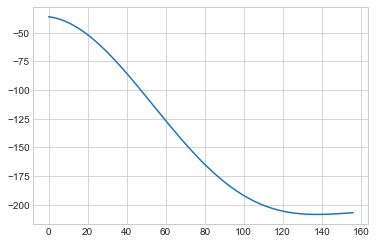

integral = tensor([[1.0000]])
sigma = 0.6810885128231474, lambda = 0.016959155975242456
 norm of the constraint : 3.653596930799805e-08
Finished after 155 iterations


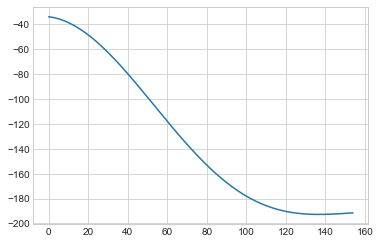

integral = tensor([[1.0000]])
here we are 
6.772006511924193
[7.57131366 7.43554769]
sigma = 0.10476718006631239, lambda = 0.09946640711021099
 norm of the constraint : 1.8715245937680353e-12
Finished after 1280 iterations


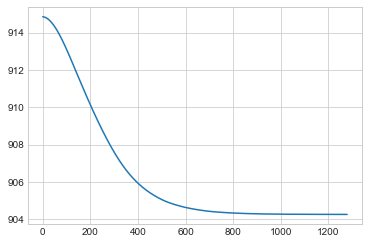

integral = tensor([[1.]])
sigma = 0.10476718006631239, lambda = 0.09946640711021099
 norm of the constraint : 1.8715245937680353e-12
Finished after 1525 iterations


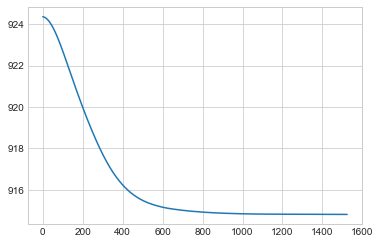

integral = tensor([[1.0000]])
here we are 
11.42906393645079
[13.71283303 11.61413286]
sigma = 0.21691518332394233, lambda = 0.005710214963542225
 norm of the constraint : 1.8715245937680353e-12
Finished after 7700 iterations


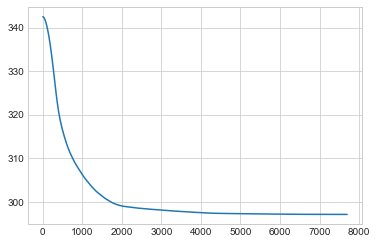

integral = tensor([[1.0000]])
sigma = 0.21691518332394233, lambda = 0.005710214963542225
 norm of the constraint : 1.8715245937680353e-12
Finished after 8715 iterations


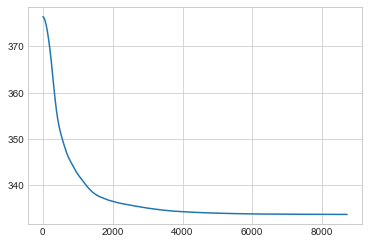

integral = tensor([[1.0000]])
here we are 
2.8069456083578337
[3.64248717 2.57774364]



In [50]:
r = utils_train.perform_study(model, X,fixed_params = fixed_params, variable_params = variable_params ,cv= cv, prune = prune,
                  n_trials = n_trials,save_path = save_path+'_option3',version = None,eta = 0,n_jobs = 1)

In [54]:
version = None
df,best_params,aux = utils_train.get_results(save_path+'_option3',model = model,version = version)
display(df)

,number,value,datetime_start,datetime_complete,duration,params_la,params_sigma,user_attrs_accuracy,user_attrs_scores,user_attrs_std,state
0,0,10.214195,2020-10-19 13:18:13.687765,2020-10-19 13:18:18.419941,00:00:04.732176,1.332076e-02,0.971144,10.214195,"[10.272868446930413, 10.208757782187957, 10.22...",0.034295,COMPLETE
1,1,9.333643,2020-10-19 13:18:18.421597,2020-10-19 13:20:57.529474,00:02:39.107877,6.557111e-06,0.910087,9.333643,"[9.460630250527604, 9.308724875520337, 9.36273...",0.076126,COMPLETE
2,2,9.309102,2020-10-19 13:20:57.530966,2020-10-19 13:23:22.192184,00:02:24.661218,6.974378e-04,0.907202,9.309102,"[9.432099970712779, 9.282516829591378, 9.33516...",0.072351,COMPLETE
3,3,4.781572,2020-10-19 13:23:22.193812,2020-10-19 13:25:45.992965,00:02:23.799153,2.485578e-07,0.507683,4.781572,"[5.161075844147859, 4.714933718687619, 4.87105...",0.227864,COMPLETE
4,4,6.110563,2020-10-19 13:25:45.994262,2020-10-19 13:25:46.836047,00:00:00.841785,1.470946e-01,0.536108,6.310474,"[6.368997477922214, 6.251949991166446]",0.058524,COMPLETE
5,5,7.909965,2020-10-19 13:25:46.837558,2020-10-19 13:26:35.048510,00:00:48.210952,1.191238e-03,0.145274,8.168745,"[9.053980331829585, 7.283509218453109]",0.885236,COMPLETE
6,6,4.527494,2020-10-19 13:26:35.049989,2020-10-19 13:29:01.636222,00:02:26.586233,4.700479e-06,0.487886,4.527494,"[4.9370725070995425, 4.456844094862867, 4.6272...",0.246703,COMPLETE
7,7,7.298511,2020-10-19 13:29:01.637482,2020-10-19 13:29:42.754653,00:00:41.117171,2.120025e-05,0.731010,7.571694,"[7.684457266407874, 7.458931374495284]",0.112763,COMPLETE
8,8,3.478257,2020-10-19 13:29:42.756148,2020-10-19 13:32:48.534791,00:03:05.778643,1.633912e-03,0.402023,3.478257,"[3.9809409608966506, 3.4205968538246467, 3.650...",0.326652,COMPLETE
9,9,8.303451,2020-10-19 13:32:48.536785,2020-10-19 13:33:53.800204,00:01:05.263419,1.000169e-04,0.852850,8.834641,"[8.919681787577147, 8.749600011975868]",0.085041,COMPLETE


In [55]:
eta = 0
params = aux(eta)
print(params)

{'sigma': 0.2827944704203799, 'la': 0.045965228130191015, 'Niter': 'auto', 'mu_base': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'eta_base': 5}


sigma = 0.2827944704203799, lambda = 0.045965228130191015
 norm of the constraint : 6.707002563299443e-12
Finished after 139 iterations


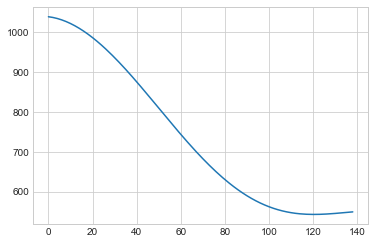

In [56]:
clf = model(**params)
clf.fit(X)

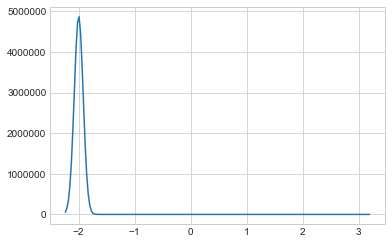

integral = tensor([[1.0000]])
integral = tensor([[1.0000]])
tensor(0)
tensor(7.1079e+09)
integral = tensor([[1.0000]])


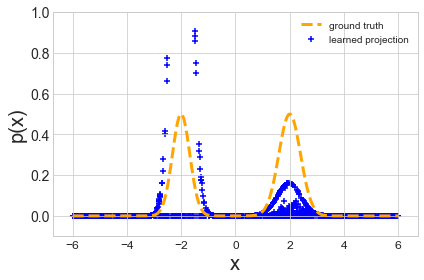

In [57]:
#xtest = torch.linspace(-,5,3000)
c,rad,ntest = 0,6,1000

xtest2 = gentest(ntest,c,rad)
xtest = torch.zeros((ntest//2,d))


xtest[:,0] = c + rad*(2*torch.rand(ntest//2) - 1)
ytest = clf.predict(xtest)
ytest2 = clf.predict(xtest2)
print((ytest < 0).sum())
print(ytest.sum()*(2*rad)**d/ntest)
ydata_set = clf.predict(data_set)



xdata = data_set


xhaha = torch.linspace(-rad,rad,200)
yhaha = 0.5*(torch.exp(-(xhaha-r_data)**2/(2*sigma_data**2)) +torch.exp(-(xhaha+r_data)**2/(2*(0.8*sigma_data)**2)) )
#yhaha = density_data(xhaha)



#xtest = torch.load(pt_path+'xtest_linear0.pt')
#ytest = torch.load(pt_path+'ytest_linear0.pt')
#xdata = torch.load(pt_path+'xdataExperiments.pt')
#ydata_set = torch.load(pt_path+'ydata_linear0.pt')


#ytestref = density_fun(xtest)



fig = plt.figure()
plt.scatter(xtest[:,0],ytest[:],lw = 1.5,label='learned projection',zorder = -1,marker = '+',color = 'b')
plt.scatter(xtest2[:,0],ytest2[:],lw = 1.5,zorder = -1,marker = '+',color = 'b')
plt.plot(xhaha,yhaha,lw = 3,linestyle = 'dashed',label = 'ground truth',color = 'orange')
#plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
#plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(-0.1,1)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=100)
plt.show()

# GLMS 

In [ ]:
version = find_last_version(path = 'models/glm_model_1D',extension = 'pickle')

print(f'last version number : {version}')

In [ ]:
parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.ExpoEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

In [ ]:
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.ExpoEstimator(**params_best)
model.fit(data_set)

In [ ]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()